# Import Necessary Modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image as Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Load the 'Fruits 360' Dataset
Download Fruits 360 dataset from https://www.kaggle.com/datasets/moltean/fruits

## Create our Train and Validation Data Generators

In [2]:
# Train Data Generator
train_datagen = Image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# Validation Data Generator
val_datagen = Image.ImageDataGenerator(rescale=1./255)

## Load the Training & Validation Datasets

In [3]:
batch_size = 32

# Load the training dataset
train_generator = train_datagen.flow_from_directory(
    directory='./Dataset/Train/',
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

# Load the validation dataset
val_generator = val_datagen.flow_from_directory(
    directory='./Dataset/Validation/',
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Store no of images present in training & validation datasets
nb_train_samples = train_generator.samples
nb_val_samples = val_generator.samples

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


# Build a Model

## Create the Model

In [4]:
# Initialize the model using Sequential class from Keras
model = Sequential()
# Add first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=(32, 32, 3), padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 3rd convolutional layer
model.add(Conv2D(filters=128, kernel_size=(
    3, 3), activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 4th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(
    3, 3), activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a flatten layer which will aid in flattening the input
model.add(Flatten())
# Add a dense/FC layer
model.add(Dense(units=512, activation='relu'))
# Add a droput layer which will aid in regularization
model.add(Dropout(0.5))
# Add a dense/FC layer
model.add(Dense(units=131, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
# Print a summary of our model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

## Define Callbacks

In [5]:
# Define a callback for saving only the best model during the training
checkpoint = ModelCheckpoint(filepath="./Trained Models/fruits_360_classifier.h5",
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

# Define a callback to stop training when validation accuracy has stopped increasing
earlystop = EarlyStopping(monitor='val_accuracy',
                          mode='max',
                          patience=3,
                          restore_best_weights=True,
                          verbose=1)

# Put our callbacks into a list
callbacks = [earlystop, checkpoint]

# Train the Model While Performing Real-Time Data Augmentation

In [6]:
# Train our model and store the training results in a variable
model_train_result = model.fit(
    x=train_generator,
    epochs=100,
    callbacks=callbacks,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=val_generator,
    validation_steps=nb_val_samples // batch_size,
    verbose=2)

Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.72898, saving model to ./Trained Models\fruits_360_classifier.h5
2115/2115 - 132s - loss: 2.2069 - accuracy: 0.3780 - val_loss: 0.8503 - val_accuracy: 0.7290
Epoch 2/100

Epoch 00002: val_accuracy improved from 0.72898 to 0.79227, saving model to ./Trained Models\fruits_360_classifier.h5
2115/2115 - 80s - loss: 0.5073 - accuracy: 0.8272 - val_loss: 0.6295 - val_accuracy: 0.7923
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.79227 to 0.88210, saving model to ./Trained Models\fruits_360_classifier.h5
2115/2115 - 86s - loss: 0.3101 - accuracy: 0.8946 - val_loss: 0.4070 - val_accuracy: 0.8821
Epoch 4/100

Epoch 00004: val_accuracy improved from 0.88210 to 0.93106, saving model to ./Trained Models\fruits_360_classifier.h5
2115/2115 - 83s - loss: 0.2349 - accuracy: 0.9212 - val_loss: 0.2334 - val_accuracy: 0.9311
Epoch 5/100

Epoch 00005: val_accuracy improved from 0.93106 to 0.94133, saving model to ./Trained Models\frui

# Evaluate Model's Performance

## Loss & Accuracy Charts

### Loss Chart

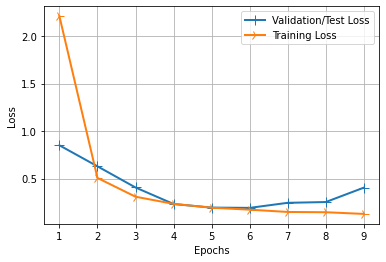

In [7]:
history_dict = model_train_result.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Accuracy Chart

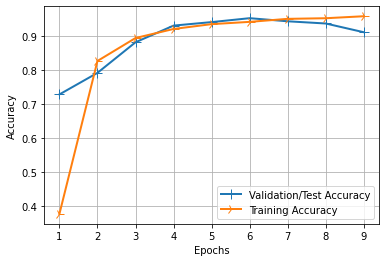

In [8]:
history_dict = model_train_result.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Classification Report for Validation Dataset

In [9]:
# Get model's predictions for each image in validation dataset
val_pred = model.predict(val_generator, nb_val_samples // batch_size + 1)
val_pred = np.argmax(val_pred, axis=1)

# Get class names
class_names = val_generator.class_indices
class_names = {v: k for k, v in class_names.items()}
class_names = list(class_names.values())

# Get the classification report generated for validation dataset
print(classification_report(y_true=val_generator.classes,  y_pred=val_pred, target_names=class_names))

                     precision    recall  f1-score   support

     Apple Braeburn       1.00      0.93      0.96       164
 Apple Crimson Snow       1.00      0.19      0.32       148
     Apple Golden 1       1.00      1.00      1.00       160
     Apple Golden 2       0.99      1.00      1.00       164
     Apple Golden 3       0.92      0.97      0.94       161
 Apple Granny Smith       0.97      1.00      0.98       164
    Apple Pink Lady       0.78      1.00      0.88       152
        Apple Red 1       0.57      1.00      0.73       164
        Apple Red 2       1.00      1.00      1.00       164
        Apple Red 3       1.00      1.00      1.00       144
Apple Red Delicious       1.00      1.00      1.00       166
 Apple Red Yellow 1       1.00      0.98      0.99       164
 Apple Red Yellow 2       1.00      1.00      1.00       219
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      1.00      1.00       143
       Avocado ripe    

## Confusion Matrix for Validation Dataset

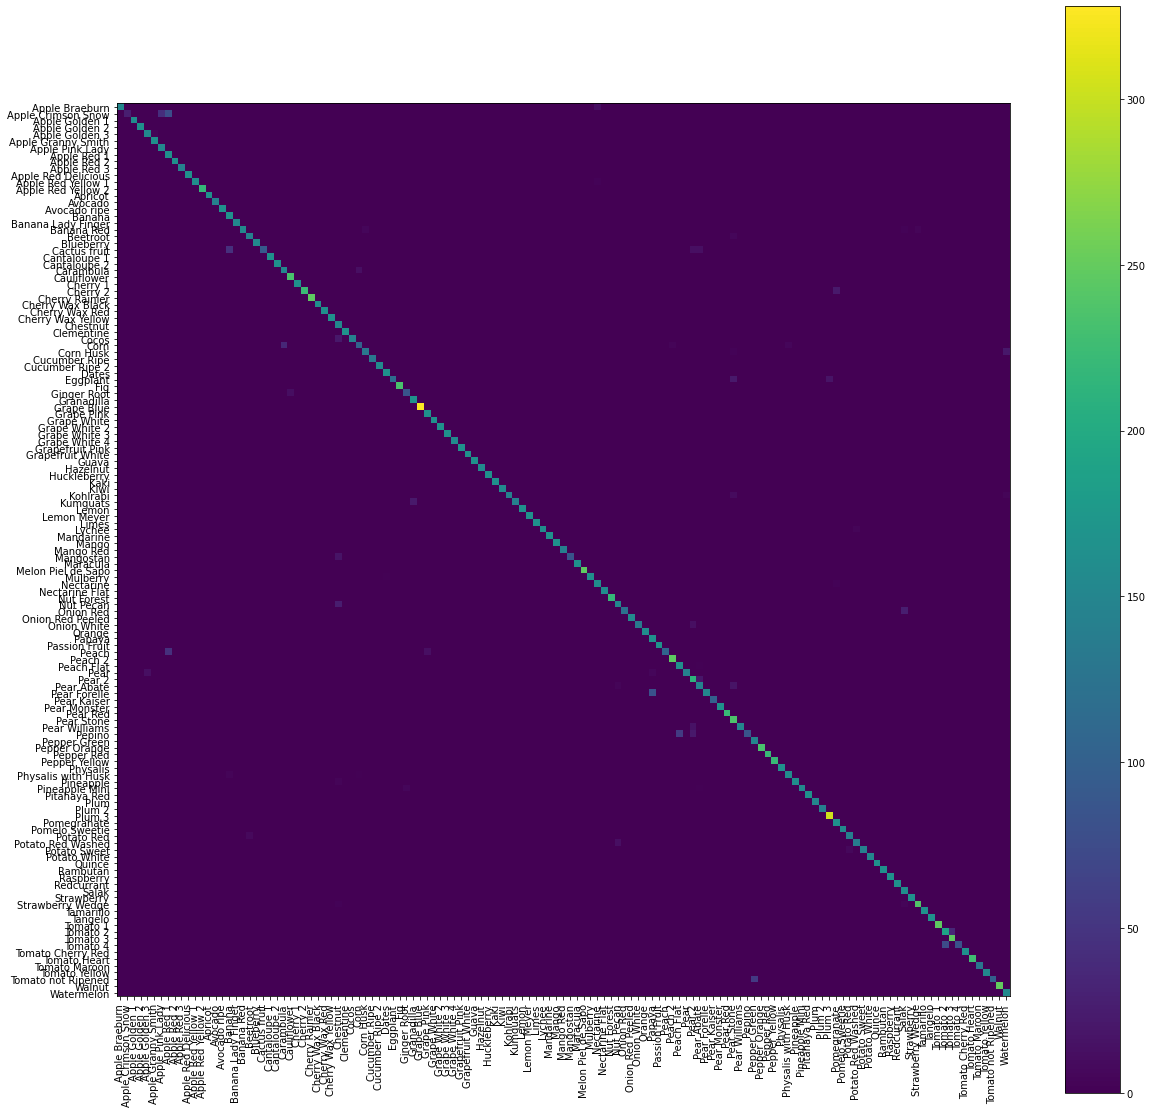

In [10]:
# Generate the confusion matrix for validation dataset
cnf_matrix = confusion_matrix(y_true=val_generator.classes, y_pred=val_pred)

# Display the confusion matrix
plt.figure(figsize=(20,20))
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(class_names))
_ = plt.xticks(tick_marks, class_names, rotation=90)
_ = plt.yticks(tick_marks, class_names)

# Classifier Demonstration

## Define Required Functions

In [11]:
# Define a function that grabs a random image from a random folder in the specified path
def get_random_image(path, img_width, img_height):
    folders = list(filter(lambda x: os.path.isdir(
        os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in os.listdir(
        file_path) if os.path.isfile(os.path.join(file_path, f))]
    random_file_index = np.random.randint(0, len(file_names))
    img_name = file_names[random_file_index]
    final_path = file_path + "/" + img_name
    img = Image.load_img(final_path, target_size=(img_width, img_height))
    return img, final_path, path_class


# Define a function that will draw class name, model's prediction & true label over the input image
def draw_test(name, pred, img, true_label):
    expanded_img = cv2.copyMakeBorder(
        img, 160, 0, 0, 500, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.putText(expanded_img, "predicted - " + pred, (20, 60),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(expanded_img, "true - " + true_label, (20, 120),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow(name, expanded_img)

## Run the Demonstration

In [12]:
path = './Dataset/Validation/'
files = []
predictions = []
true_labels = []

for i in range(0, 10):
    img, final_path, true_label = get_random_image(path, 32, 32)
    files.append(final_path)
    true_labels.append(true_label)
    x = Image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = np.argmax(model.predict(x), axis=-1)
    predictions.append(classes)

for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Fruits 360 Classifier - Demo",
              class_names[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()